In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, recall_score

In [12]:
train_data = pd.read_csv("C:/Users/apoor/Downloads/crime Project/crime Project/train.csv")
test_data = pd.read_csv("C:/Users/apoor/Downloads/crime Project/crime Project/test.csv")

In [13]:
train_data = train_data.drop(["Descript", "Resolution"], axis=1)

In [14]:
def transform_dataset(dataset):
    dataset['Dates'] = pd.to_datetime(dataset['Dates'])
    dataset['n_days'] = (dataset['Dates'] - dataset['Dates'].min()).dt.days
    dataset['Year'] = dataset['Dates'].dt.year
    dataset['DayOfWeek'] = dataset['Dates'].dt.dayofweek
    dataset['WeekOfYear'] = dataset['Dates'].dt.isocalendar().week
    dataset['Month'] = dataset['Dates'].dt.month
    dataset['Hour'] = dataset['Dates'].dt.hour
    dataset['Block'] = dataset['Address'].str.contains('block', case=False).astype(int)
    dataset = dataset.drop(['Dates', 'Address'], axis=1)
    dataset = pd.get_dummies(dataset, columns=['PdDistrict'], drop_first=True)
    return dataset

In [15]:
train_data = transform_dataset(train_data)
test_data = transform_dataset(test_data)

train_data = train_data[train_data["Y"] < 80]

C:\Users\apoor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\apoor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

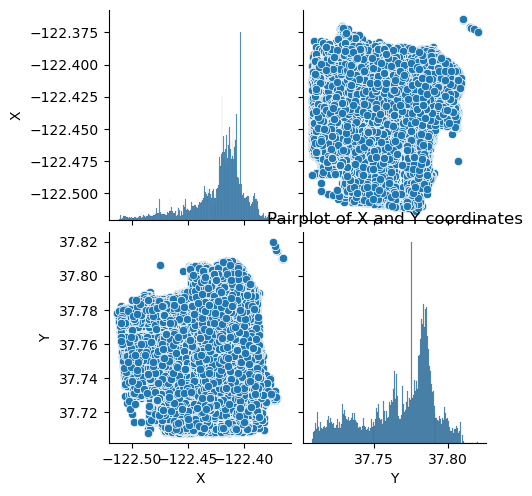

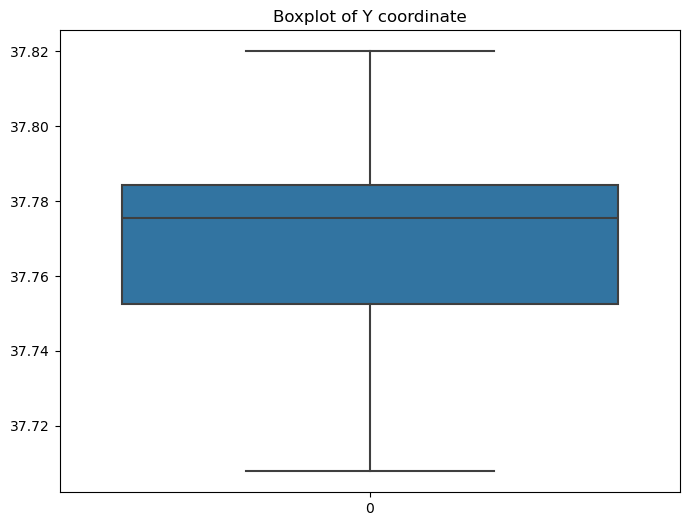

C:\Users\apoor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


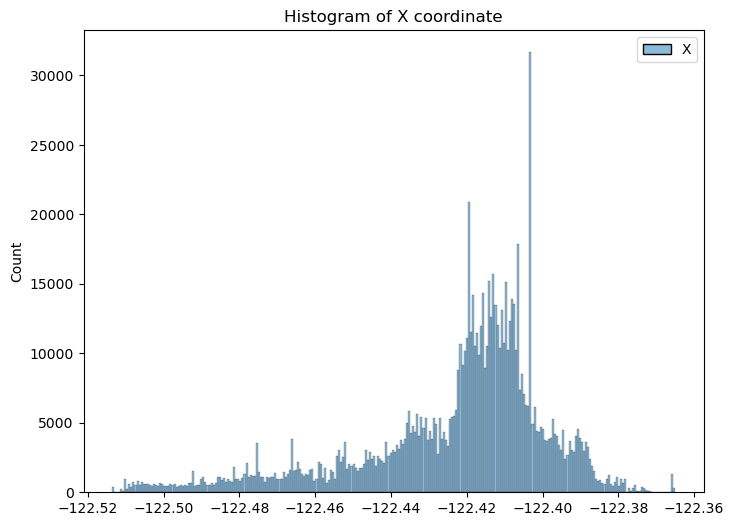

In [16]:
plt.figure(figsize=(10, 6))
sns.pairplot(train_data[["X", "Y"]])
plt.title("Pairplot of X and Y coordinates")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(train_data["Y"])
plt.title("Boxplot of Y coordinate")
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(train_data[["X"]])
plt.title("Histogram of X coordinate")
plt.show()

In [17]:
X = train_data.drop("Category", axis=1)
y = train_data["Category"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [23]:
rfc = RandomForestClassifier(n_estimators=40, min_samples_split=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)


In [24]:
print("Classification Report (Random Forest):")
print(classification_report(y_test, rfc_pred))

Classification Report (Random Forest):


C:\Users\apoor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\apoor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       172
                    ASSAULT       0.19      0.18      0.18      7580
                 BAD CHECKS       0.00      0.00      0.00        45
                    BRIBERY       0.00      0.00      0.00        36
                   BURGLARY       0.26      0.04      0.07      3760
         DISORDERLY CONDUCT       0.15      0.01      0.02       434
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       207
              DRUG/NARCOTIC       0.35      0.43      0.39      5583
                DRUNKENNESS       0.00      0.00      0.00       446
               EMBEZZLEMENT       0.00      0.00      0.00       101
                  EXTORTION       0.00      0.00      0.00        21
            FAMILY OFFENSES       0.00      0.00      0.00        41
     FORGERY/COUNTERFEITING       0.18      0.00      0.00      1032
                      FRAUD      

C:\Users\apoor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
f1_rfc = f1_score(y_test, rfc_pred, average='weighted')
recall_rfc = recall_score(y_test, rfc_pred, average='weighted')
print("Random Forest F1 Score:", f1_rfc)
print("Random Forest Recall Score:", recall_rfc)


Random Forest F1 Score: 0.22942735534006076
Random Forest Recall Score: 0.29486668413079875


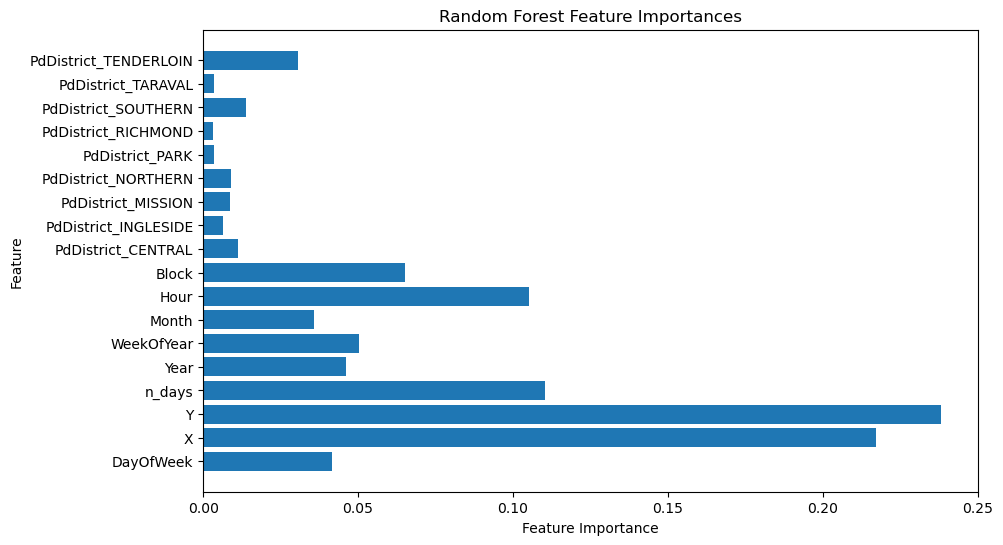

In [22]:
n_features = X.shape[1]
plt.figure(figsize=(10, 6))
plt.barh(range(n_features), rfc.feature_importances_)
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()